<a href="https://colab.research.google.com/github/HenryWatson11/WaveDetectorInator3000/blob/main/WaveDetetorModelMK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
import keras
matplotlib.use("Agg")
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import numpy as np
import random
import os
from matplotlib import pyplot as plt



In [ ]:
!pip install piexif

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
os.listdir("./drive/MyDrive/Wave Detector Images")

Mounted at /content/drive


['Test', 'Train']

In [ ]:
from keras.layers import Dense, Activation, Flatten

In [ ]:
##BASIC MODEL

from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory('./drive/MyDrive/Wave Detector Images/Train', target_size=(224, 224), batch_size=32, class_mode='categorical')

# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10)

# Evaluate on the test set
test_generator = test_datagen.flow_from_directory('./drive/MyDrive/Wave Detector Images/Test', target_size=(224, 224), batch_size=32, class_mode='categorical')
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

Found 93 images belonging to 4 classes.
Epoch 1/10
3/3 [==============================] - 11s 3s/step - loss: 36.1540 - accuracy: 0.3548
Epoch 2/10
3/3 [==============================] - 6s 2s/step - loss: 20.5266 - accuracy: 0.3656
Epoch 3/10
3/3 [==============================] - 9s 2s/step - loss: 16.9274 - accuracy: 0.4516
Epoch 4/10
3/3 [==============================] - 6s 2s/step - loss: 11.5390 - accuracy: 0.3763
Epoch 5/10
3/3 [==============================] - 7s 2s/step - loss: 6.0373 - accuracy: 0.3978
Epoch 6/10
3/3 [==============================] - 6s 2s/step - loss: 4.6829 - accuracy: 0.5806
Epoch 7/10
3/3 [==============================] - 6s 2s/step - loss: 3.3808 - accuracy: 0.3978
Epoch 8/10
3/3 [==============================] - 9s 2s/step - loss: 1.6173 - accuracy: 0.6129
Epoch 9/10
3/3 [==============================] - 6s 2s/step - loss: 1.0575 - accuracy: 0.6022
Epoch 10/10
3/3 [==============================] - 6s 2s/step - loss: 0.9364 - accuracy: 0.6344
Foun

In [ ]:
##OLD FEATURE EXTRACTION AND PIKL FILE CONVERSION (NO LONGER USED)

from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.models import Model
from pickle import dump
import os

# Function to extract features using VGG16 model
def extract_features(directory):
    model = VGG16()
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    features = dict()

    for filename in os.listdir(directory):
        path = os.path.join(directory, filename)
        try:
            #print(f"Processing image: {filename}")

            image = load_img(path, target_size=(224, 224))
            image = img_to_array(image)
            image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
            image = preprocess_input(image)
            feature = model.predict(image, verbose=0)
            image_id = filename.split('.')[0]
            features[image_id] = feature
        except Exception as e:
            print(f"Error processing image {filename}: {str(e)}")

    return features

# Extract features for the training dataset
train_features1 = extract_features('./drive/MyDrive/Wave Detector Images/Train/1')
train_features3 = extract_features('./drive/MyDrive/Wave Detector Images/Train/3')
train_features5 = extract_features('./drive/MyDrive/Wave Detector Images/Train/5')
train_features7 = extract_features('./drive/MyDrive/Wave Detector Images/Train/7')



In [ ]:
##NO LONGER USED
features_array = np.array(train_features1)

In [ ]:
##NO LONGER USED
print(features_array.shape)

In [ ]:
##NO LONGER USED
test_features1 = extract_features('./drive/MyDrive/Wave Detector Images/Test/1')
test_features3 = extract_features('./drive/MyDrive/Wave Detector Images/Test/3')
test_features5 = extract_features('./drive/MyDrive/Wave Detector Images/Test/5')
test_features7 = extract_features('./drive/MyDrive/Wave Detector Images/Test/7')

In [ ]:
##NO LONGER USED
print(test_features1)

In [ ]:
##ATTEMPTED CONVERVSION TO NUMPY FROM PIKL NO LONGER USED
X_train = []
y_train = []
x = 1
grand_features = [train_features1.values(), train_features3.values(), train_features5.values(), train_features7.values()]
for gf in grand_features:
  for features in gf:
    X_train.append(features)
    y_train.append(x)
  x = x + 2
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train = X_train.reshape((93, 4096))

In [ ]:
##NO LONGER USED
print(X_train)

[[0.         0.54783565 0.80448085 ... 1.4006131  0.         0.        ]
 [0.         1.2917182  1.090375   ... 2.3968258  0.         0.        ]
 [0.         0.         1.9170331  ... 0.86083233 0.         0.        ]
 ...
 [0.56703514 0.         1.3879606  ... 0.         0.         1.1612408 ]
 [0.3669699  0.         0.03711605 ... 0.         0.         0.        ]
 [1.7006311  0.         0.5967729  ... 0.         0.         0.        ]]


In [ ]:
##NO LONGER USED
print(y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 7 7]


In [ ]:
##NO LONGER USED
print(X_train.shape)

(93, 4096)


In [ ]:
##ATTEMPTED CONVERSION TO NUMPY FROM PIKL NO LONGER USED
X_test = []
y_test = []
x = 1
grand_features_test = [test_features1.values, test_features3.values, test_features5.values, test_features7.values]
for gf2 in grand_features_test:
  for featurez in gf2:
    X_test.append(featurez)
    y_test.append(x)
  x = x + 2
X_test = np.array(X_test)
y_test = np.array(y_test)



AttributeError: ignored

In [ ]:
##NO LONGER USED
print(y_test)

[1 1 3 3 5 5 7 7]


In [ ]:
##HARDCODED LABELS
y_test = [1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7]

In [ ]:
##HARDCODED LABELS
y_train = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7]

In [ ]:
##LOGISTIC REGRESSION MODEL AND CONFUSION MATRIX
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from sklearn.linear_model import LogisticRegression

model2 = InceptionV3(include_top = False, input_shape = (200, 200, 3))
model2 = Model(inputs = model.inputs, outputs = model.layers[-1].output)

x_train_FE = model.predict(train_generator)
x_train_FE = x_train_FE.reshape(x_train_FE.shape[0], -1)

print(x_train_FE.shape)

x_test_FE = model.predict(test_generator)
x_test_FE = x_test_FE.reshape(x_test_FE.shape[0], -1)

lr_model2 = LogisticRegression()
lr_model2.fit(x_train_FE, y_train)
predictions = lr_model2.predict(x_test_FE)
from sklearn.metrics import accuracy_score
accuracy_score(predictions, y_test)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test contains the true labels for your test data

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
classes = ["1", "3", "5", "7"]  # Replace with your actual class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()
plt.savefig('confusion_matrix.png')



3/3 [==============================] - 4s 690ms/step
(93, 4)
1/1 [==============================] - 0s 381ms/step


In [ ]:
#NO LONGER USED
dump(train_features1, open('train_features1.pkl', 'wb'))
dump(train_features3, open('train_features3.pkl', 'wb'))
dump(train_features5, open('train_features5.pkl', 'wb'))
dump(train_features7, open('train_features7.pkl', 'wb'))
dump(train_features9, open('train_features9.pkl', 'wb'))

In [ ]:
# ATTEMPTED PIKL/NUMPY TO MODEL
from pickle import load
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

# Load extracted features for each class
#train_features1 = load(open('train_features1.pkl', 'rb'))
#train_features3 = load(open('train_features3.pkl', 'rb'))
#train_features5 = load(open('train_features5.pkl', 'rb'))
#train_features7 = load(open('train_features7.pkl', 'rb'))
#train_features9 = load(open('train_features9.pkl', 'rb'))

# Combine features and labels
#X_train = np.concatenate([train_features1, train_features3, train_features5, train_features7, train_features9])
#y_train = np.array([1]*len(train_features1) + [3]*len(train_features3) + [5]*len(train_features5) +
                   #[7]*len(train_features7) + [9]*len(train_features9))

from keras.models import Sequential
from keras.layers import Dense

# One-hot encode the labels
y_train_one_hot = np.zeros((len(y_train), np.max(y_train)+1))
y_train_one_hot[np.arange(len(y_train)), y_train] = 1

# Build CNN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # Corrected input_shape
model.add(Dense(np.max(y_train)+1, activation='softmax'))  # Adjust units for the number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_one_hot, epochs=10)

TypeError: ignored

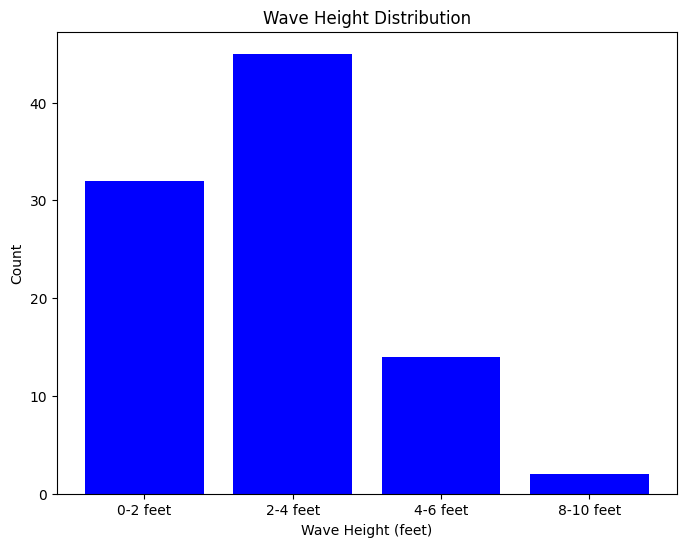

In [ ]:
import matplotlib.pyplot as plt

# Data
wave_heights = ['0-2 feet', '2-4 feet', '4-6 feet', '8-10 feet']
wave_counts = [32, 45, 14, 2]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(wave_heights, wave_counts, color='blue')
plt.title('Wave Height Distribution')
plt.xlabel('Wave Height (feet)')
plt.ylabel('Count')
plt.show()